## Basic comparison across Cook et al. and Wivliet et al. chemical connectome datasets
### The comparison focuses only on chemical connectome because the Witvliet et al. dataset does not have electrical synapses

In [1]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib_venn import venn2, venn3
import seaborn as sns
import scipy.stats as stats

In [2]:
#figure saving formatting
matplotlib.rcParams['pdf.fonttype'] = 42
plt.rcParams.update({'font.family':'Arial'})
plt.rcParams['pdf.fonttype'] = 42
sns.set(font_scale=1)
sns.set_theme(style='white')

### Load datasets

In [3]:
full_path = Path(os.getcwd())
#load the edgelists
cook_herm_chem = pd.read_csv(Path(full_path.parent, 'data','cook_herm_chem_edgelist.csv'))
cook_male_chem = pd.read_csv(Path(full_path.parent, 'data','cook_male_chem_edgelist.csv'))
cook_herm_elec = pd.read_csv(Path(full_path.parent, 'data','cook_herm_elec_edgelist.csv'))
cook_male_elec = pd.read_csv(Path(full_path.parent, 'data','cook_male_elec_edgelist.csv'))
cook_herm_comb = pd.read_csv(Path(full_path.parent, 'data','cook_herm_combined_edgelist.csv'))
cook_male_comb = pd.read_csv(Path(full_path.parent, 'data','cook_male_combined_edgelist.csv'))
wit7 = pd.read_csv(Path(full_path.parent, 'data','wit_d7_edgelist.csv'))
wit8 = pd.read_csv(Path(full_path.parent, 'data','wit_d8_edgelist.csv'))

cook_herm_chem.head()

,Source,Target,Weight,source_ct,target_ct
0,ASIL,AWAR,2.0,sensory,sensory
1,ASIL,ASGL,3.0,sensory,sensory
2,ASIL,ASER,8.0,sensory,sensory
3,ASIL,ADFL,1.0,sensory,sensory
4,ASIL,AWCL,3.0,sensory,sensory


### Venn-diagram of synaptic overlaps

In [4]:
#combine source and target (edgelist) to create synapse list
def edgelist_to_synlist (edgelist):
    synlist = edgelist['Source'].astype(str)+'_'+edgelist['Target'].astype(str)
    synlist = synlist.apply(lambda x:x.replace(" ",""))
    #also create a dataframe with the synapse list and its weight
    syn_weight = pd.DataFrame({'synapse':synlist, 'weight':edgelist['Weight']})
    return synlist, syn_weight
    
#cook herm
cook_herm_syn_chem, cook_herm_synweight_chem  = edgelist_to_synlist(cook_herm_chem)
cook_herm_syn_elec, cook_herm_synweight_elec = edgelist_to_synlist(cook_herm_elec)
cook_herm_syn_comb, cook_herm_synweight_comb = edgelist_to_synlist(cook_herm_comb)

#cook male
cook_male_syn_chem, cook_male_synweight_chem = edgelist_to_synlist(cook_male_chem)
cook_male_syn_elec, cook_male_synweight_elec = edgelist_to_synlist(cook_male_elec)
cook_male_syn_comb, cook_male_synweight_comb = edgelist_to_synlist(cook_male_comb)

#witv
wit7_syn, wit7_synweight =  edgelist_to_synlist(wit7)
wit8_syn, wit8_synweight =  edgelist_to_synlist(wit8)

cook_herm_syn_chem.head()


0    ASIL_AWAR
1    ASIL_ASGL
2    ASIL_ASER
3    ASIL_ADFL
4    ASIL_AWCL
dtype: object

### Ven diagram plot of the overlap herm and male connectomes. 

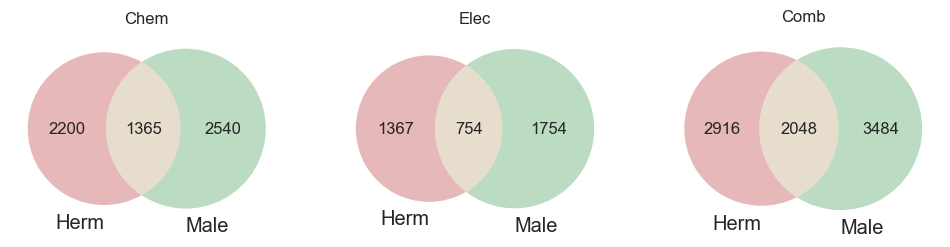

In [5]:
fig, axs = plt.subplots(1,3, figsize=(12,4))
venn2([set(cook_herm_syn_chem), set(cook_male_syn_chem)],set_labels=('Herm', 'Male'), ax=axs[0])
venn2([set(cook_herm_syn_elec), set(cook_male_syn_elec)],set_labels=('Herm', 'Male'), ax=axs[1])
venn2([set(cook_herm_syn_comb), set(cook_male_syn_comb)],set_labels=('Herm', 'Male'), ax=axs[2])

axs[0].set_title('Chem')
axs[1].set_title('Elec')
axs[2].set_title('Comb')
plt.show()

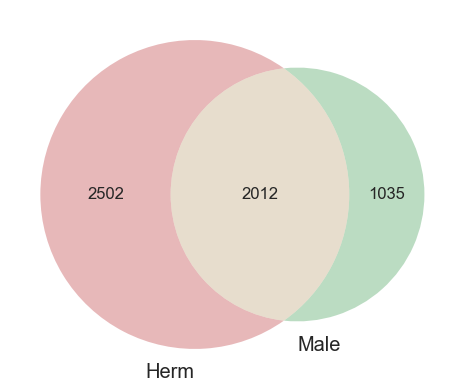

In [45]:
#comb sex-shared neurons
ss_neurons = set(cook_herm_comb.Source) & set(cook_herm_comb.Target) & set(cook_male_comb.Source) & set(cook_male_comb.Target)
cook_herm_comb_ss = cook_herm_comb[(cook_herm_comb.Source.isin(ss_neurons))&(cook_herm_comb.Target.isin(ss_neurons))]
cook_male_comb_ss = cook_male_comb[(cook_male_comb.Source.isin(ss_neurons))&(cook_male_comb.Target.isin(ss_neurons))]

cook_herm_syn_comb_ss, cook_herm_synweight_comb_ss = edgelist_to_synlist(cook_herm_comb_ss)
cook_male_syn_comb_ss, cook_male_synweight_comb_ss = edgelist_to_synlist(cook_male_comb_ss)
venn2([set(cook_herm_syn_comb_ss), set(cook_male_syn_comb_ss)],set_labels=('Herm', 'Male'))

plt.show()

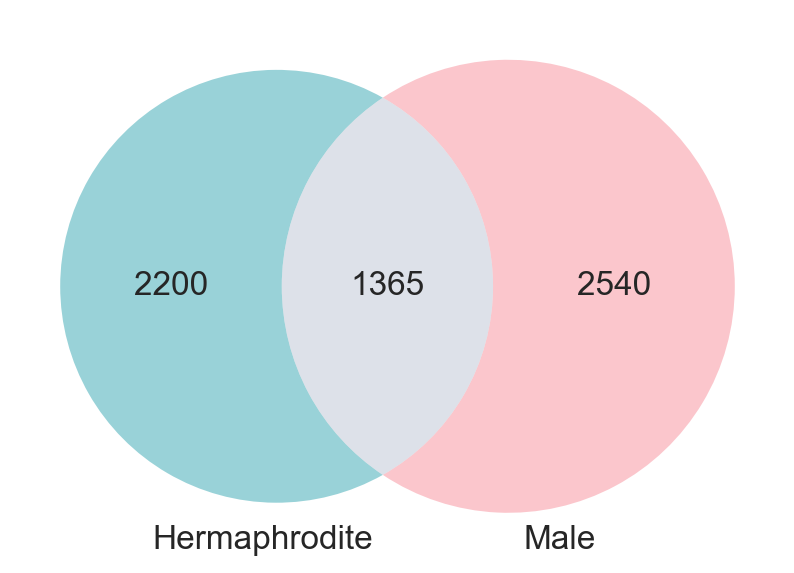

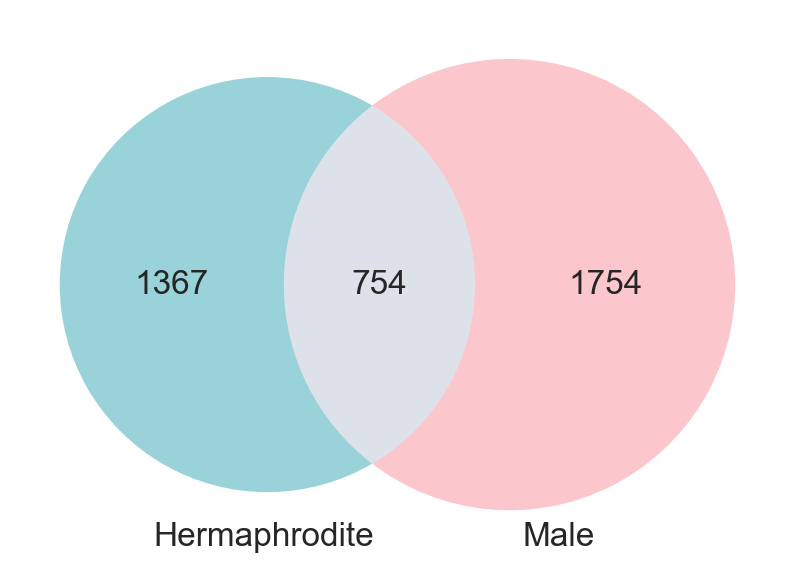

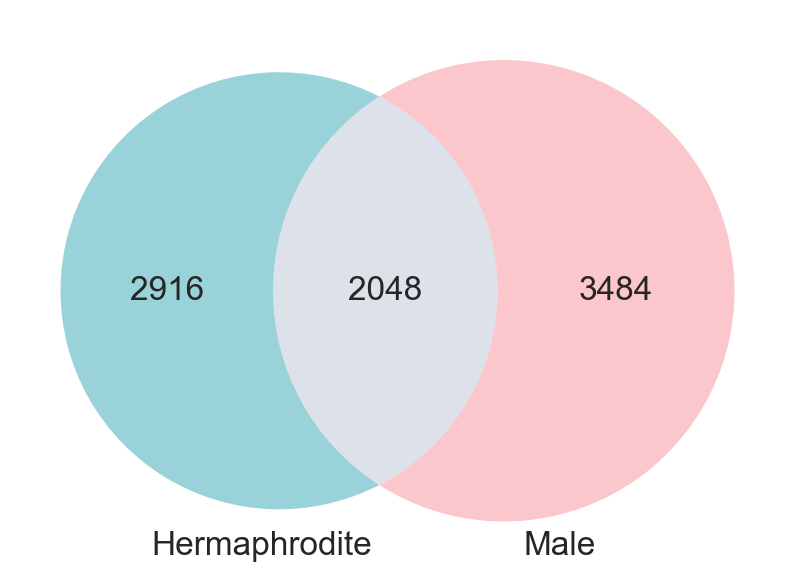

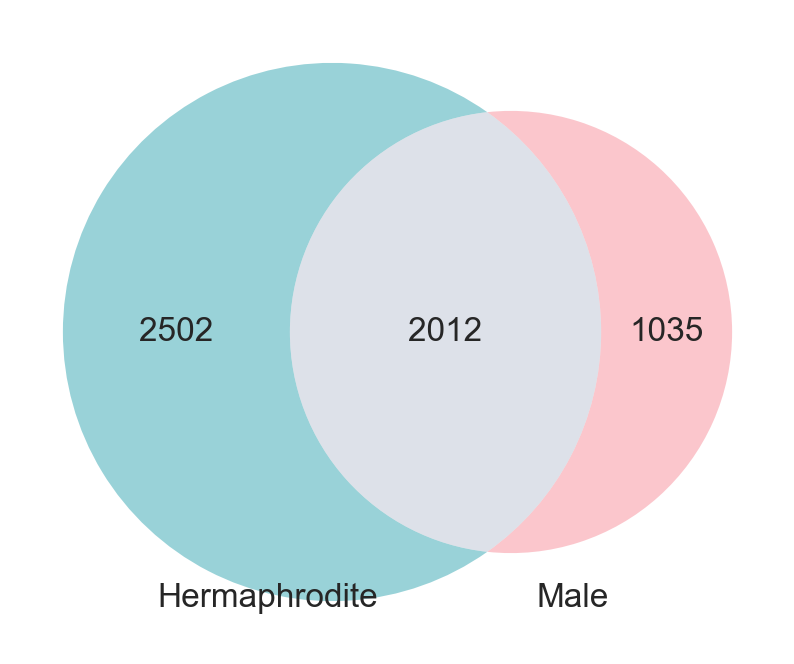

In [52]:
# Ven diagrams for saving (chemical and electrical connectome)
def save_venn2(data1,data2, save_path):
    
    plt.figure(figsize=(10, 10))
    diagram = venn2(
        [set(data1), set(data2)],
        set_labels=('Hermaphrodite', 'Male'),
        set_colors=('#00909e', '#f67280')
    )
    # Adjust the position of the set labels
    diagram.set_labels[0].set_position((-0.05, -0.475))  # Adjust the position of the first set label
    diagram.set_labels[1].set_position((0.25, -0.475))   # Adjust the position of the second set label
    diagram.set_labels[0].set_fontsize(24)  # Set font size for the first set label
    diagram.set_labels[1].set_fontsize(24)  # Set font size for the second set label
    
    # Add percentages to each section
    for idx, subset_label in enumerate(['10', '01', '11']):
        label = diagram.get_label_by_id(subset_label)
        if label:  # Check if the subset exists
            label.set_fontsize(24)  # Adjust font size
            label.set_horizontalalignment('center')  # Align to center
            label.set_verticalalignment('center')    # Align to center
    
    plt.savefig(save_path)

save_path_chem = Path(full_path.parent,'figure_components/herm_chem_male_venn_diagram.pdf')
save_path_elec = Path(full_path.parent,'figure_components/herm_elec_male_venn_diagram.pdf')
save_path_comb = Path(full_path.parent,'figure_components/herm_comb_male_venn_diagram.pdf')
save_path_comb_ss = Path(full_path.parent,'figure_components/herm_comb_male_ss_venn_diagram.pdf')
save_venn2(cook_herm_syn_chem,cook_male_syn_chem,save_path_chem)
save_venn2(cook_herm_syn_elec,cook_male_syn_elec,save_path_elec) 
save_venn2(cook_herm_syn_comb,cook_male_syn_comb,save_path_comb)
save_venn2(cook_herm_syn_comb_ss, cook_male_syn_comb_ss,save_path_comb_ss)

### Ven diagram to show overlap of Cook and Witvliet datasets

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/matplotlib_venn/_venn3.py:165: UserWarning: normalize_to is deprecated. Please use layout_algorithm=matplotlib_venn.layout.venn3.DefaultLayoutAlgorithm(normalize_to) instead.
  warnings.warn(


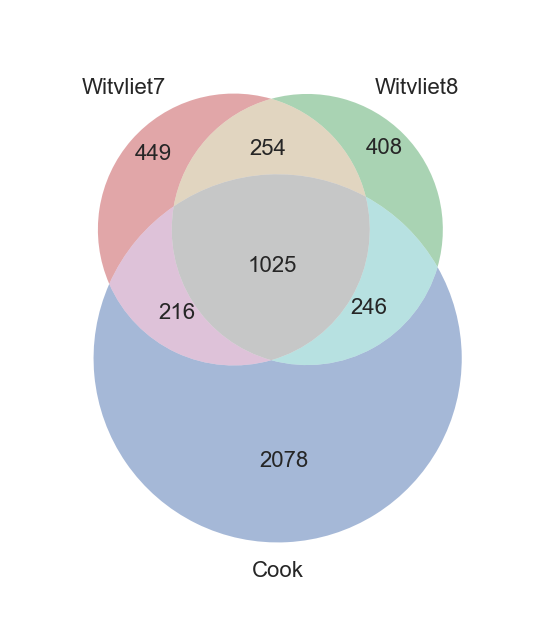

In [7]:
plt.figure(figsize=(8, 8))

diagram = venn3([set(wit7_syn), set(wit8_syn), set(cook_herm_syn_chem)],
                set_labels=('Witvliet7','Witvliet8', 'Cook'),
                 normalize_to=0.2, alpha=0.5)

for label in diagram.set_labels:
    if label:  # Check if the label exists (not None)
        label.set_fontsize(16)  # Set your desired font size


id_list = ['100','010','110','001','101','011','111'] #this can be found by diagram.id2idx
# Add percentages to each section
for idx, subset_label in enumerate(id_list):
    label = diagram.get_label_by_id(subset_label)
    if label:  # Check if the subset exists
        label.set_fontsize(16)  # Adjust font size
        label.set_horizontalalignment('center')  # Align to center
        label.set_verticalalignment('center')    # Align to center

plt.savefig(Path(full_path.parent,'figure_components/cook_witvliet_herm_venn_diagram.pdf'))

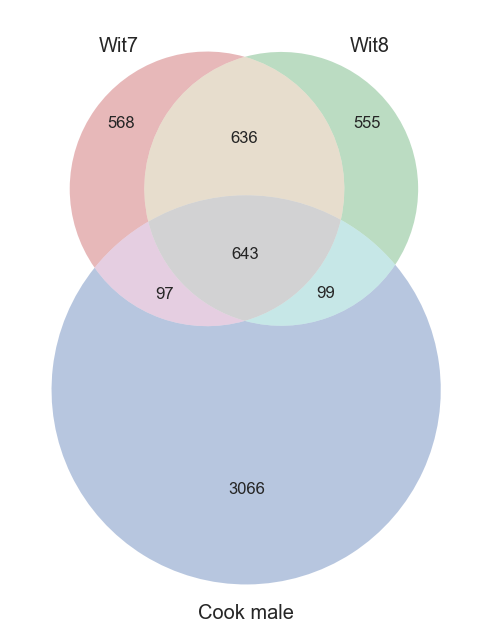

In [8]:
plt.figure(figsize=(8,8))

venn3([set(wit7_syn), set(wit8_syn), set(cook_male_syn_chem)], set_labels=('Wit7','Wit8', 'Cook male'))
plt.show()

### Scatter plot of relationship between connectivity weight between overlapping synapses

In [9]:
#merge the weights together

chem_syn_weights = cook_herm_synweight_chem.merge(wit7_synweight, on='synapse', how='outer',suffixes=(('_cook_herm_chem','_wit7'))
                 ).merge(wit8_synweight,on='synapse', how='outer').merge(cook_male_synweight_chem, on='synapse',how='outer')
chem_syn_weights = chem_syn_weights.rename(columns={'weight_x':'weight_wit8', 'weight_y':'weight_cook_male_chem'})

cook_elec_syn_weights = cook_herm_synweight_elec.merge(cook_male_synweight_elec, on='synapse', 
                                                       how='outer',suffixes=(('_herm_elec','_male_elec')))

cook_comb_syn_weights = cook_herm_synweight_comb.merge(cook_male_synweight_comb, on='synapse', 
                                                       how='outer',suffixes=(('_herm_comb','_male_comb')))


chem_syn_weights.head()


,synapse,weight_cook_herm_chem,weight_wit7,weight_wit8,weight_cook_male_chem
0,ADAL_ADAL,6.0,NaN,NaN,NaN
1,ADAL_ADLL,2.0,NaN,NaN,NaN
2,ADAL_AIAL,2.0,2.0,NaN,NaN
3,ADAL_AIBL,2.0,2.0,NaN,8.0
4,ADAL_AIBR,2.0,1.0,NaN,NaN


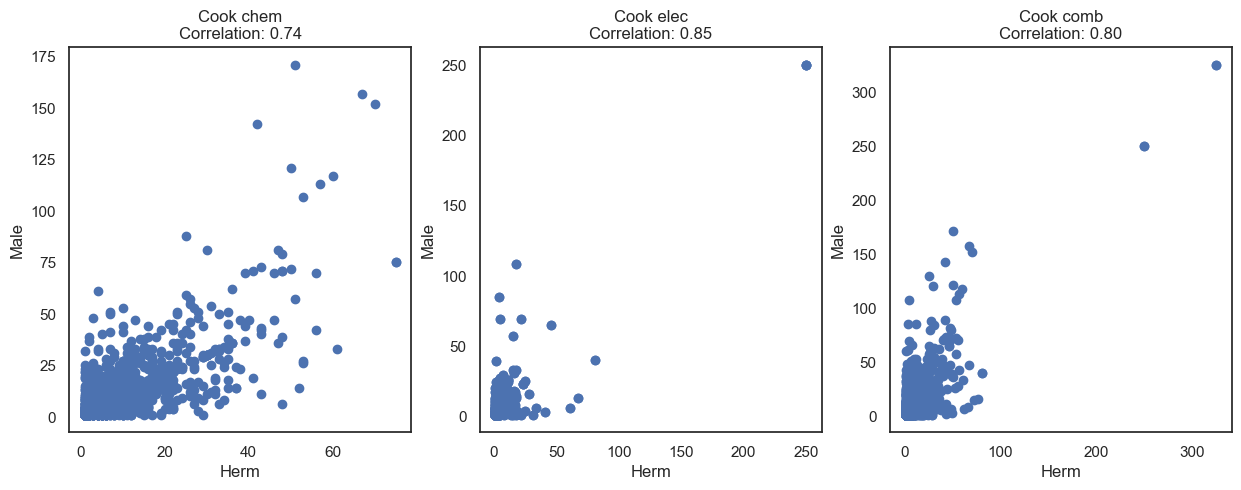

In [10]:
#Cook weight scatter plots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# chem
df = chem_syn_weights.dropna(subset=['weight_cook_herm_chem', 'weight_cook_male_chem'])
axes[0].scatter(df['weight_cook_herm_chem'], df['weight_cook_male_chem'])
correlation1 = df['weight_cook_herm_chem'].corr(df['weight_cook_male_chem'])
axes[0].set_title(f'Cook chem\nCorrelation: {correlation1:.2f}')
axes[0].set_xlabel('Herm')
axes[0].set_ylabel('Male')

# elec
df = cook_elec_syn_weights.dropna(subset=['weight_herm_elec', 'weight_male_elec'])
axes[1].scatter(df['weight_herm_elec'], df['weight_male_elec'])
correlation1 = df['weight_herm_elec'].corr(df['weight_male_elec'])
axes[1].set_title(f'Cook elec\nCorrelation: {correlation1:.2f}')
axes[1].set_xlabel('Herm')
axes[1].set_ylabel('Male')

# comb
df = cook_comb_syn_weights.dropna(subset=['weight_herm_comb', 'weight_male_comb'])
axes[2].scatter(df['weight_herm_comb'], df['weight_male_comb'])
correlation1 = df['weight_herm_comb'].corr(df['weight_male_comb'])
axes[2].set_title(f'Cook comb\nCorrelation: {correlation1:.2f}')
axes[2].set_xlabel('Herm')
axes[2].set_ylabel('Male')

plt.show()

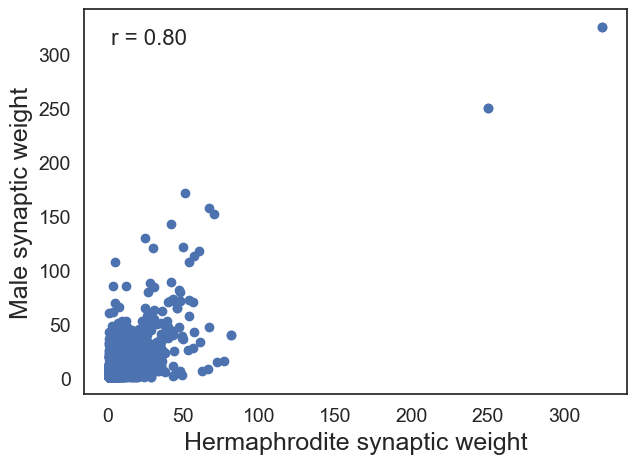

In [25]:
# Combined synapses weight scatter plot for saving
df = cook_comb_syn_weights.dropna(subset=['weight_herm_comb', 'weight_male_comb'])
#plt.tight_layout()
plt.figure(figsize=(7,5))
plt.scatter(df['weight_herm_comb'], df['weight_male_comb'])
plt.xlabel('Hermaphrodite synaptic weight', fontsize=18)
plt.ylabel('Male synaptic weight', fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add the correlation text in the top-left corner of the plot
correlation1 = df['weight_herm_comb'].corr(df['weight_male_comb'])
plt.text(x=0.05, y=0.95, s=f'r = {correlation1:.2f}', fontsize=16, 
         transform=plt.gca().transAxes, verticalalignment='top')

plt.savefig(Path(full_path.parent,'figure_components/herm_male_comb_synaptic_weight_scatter.pdf'))
plt.show()

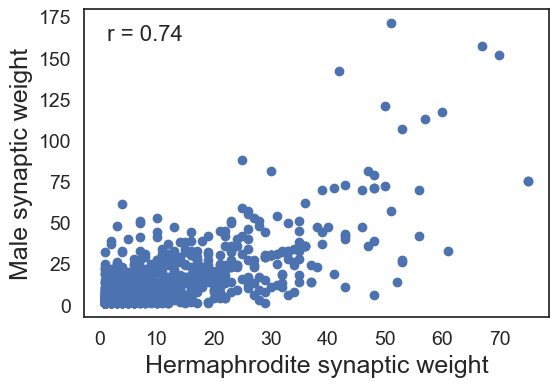

In [24]:
# Chem synapses weight scatter plot for saving
df = chem_syn_weights.dropna(subset=['weight_cook_herm_chem', 'weight_cook_male_chem'])
plt.figure(figsize=(6,4))
plt.scatter(df['weight_cook_herm_chem'], df['weight_cook_male_chem'])
plt.xlabel('Hermaphrodite synaptic weight', fontsize=18)
plt.ylabel('Male synaptic weight', fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add the correlation text in the top-left corner of the plot
correlation1 = df['weight_cook_herm_chem'].corr(df['weight_cook_male_chem'])
plt.text(x=0.05, y=0.95, s=f'r = {correlation1:.2f}', fontsize=16, 
         transform=plt.gca().transAxes, verticalalignment='top')

plt.savefig(Path(full_path.parent,'figure_components/herm_male_chem_synaptic_weight_scatter.pdf'))
plt.show()

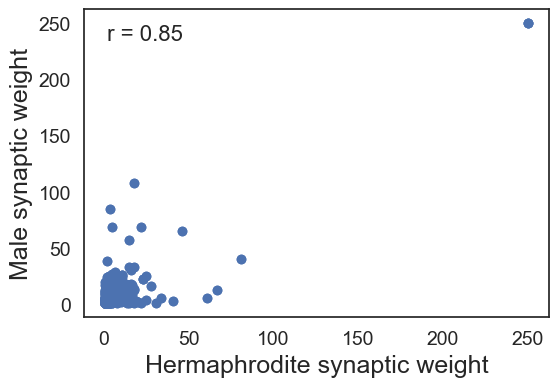

In [23]:
# Elec synapses weight scatter plot for saving
df = cook_elec_syn_weights.dropna(subset=['weight_herm_elec', 'weight_male_elec'])
#plt.tight_layout()
plt.figure(figsize=(6,4))
plt.scatter(df['weight_herm_elec'], df['weight_male_elec'])
plt.xlabel('Hermaphrodite synaptic weight', fontsize=18)
plt.ylabel('Male synaptic weight', fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add the correlation text in the top-left corner of the plot
correlation1 = df['weight_herm_elec'].corr(df['weight_male_elec'])
plt.text(x=0.05, y=0.95, s=f'r = {correlation1:.2f}', fontsize=16, 
         transform=plt.gca().transAxes, verticalalignment='top')

plt.savefig(Path(full_path.parent,'figure_components/herm_male_elec_synaptic_weight_scatter.pdf'))
plt.show()

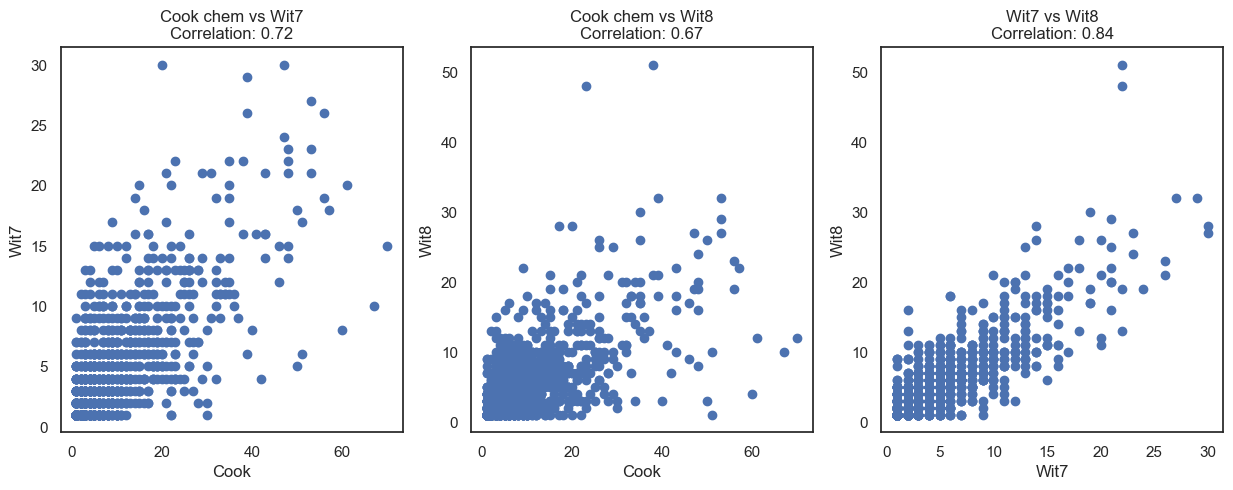

In [18]:
#Cook vs Witviliet scatter plots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Cook chem vs Wit7 
df = chem_syn_weights.dropna(subset=['weight_cook_herm_chem', 'weight_wit7'])
axes[0].scatter(df['weight_cook_herm_chem'], df['weight_wit7'])
correlation1 = df['weight_cook_herm_chem'].corr(df['weight_wit7'])
axes[0].set_title(f'Cook chem vs Wit7\nCorrelation: {correlation1:.2f}')
axes[0].set_xlabel('Cook')
axes[0].set_ylabel('Wit7')

# Cook chem vs Wit8
df = chem_syn_weights.dropna(subset=['weight_cook_herm_chem', 'weight_wit8'])
axes[1].scatter(df['weight_cook_herm_chem'], df['weight_wit8'])
correlation1 = df['weight_cook_herm_chem'].corr(df['weight_wit8'])
axes[1].set_title(f'Cook chem vs Wit8\nCorrelation: {correlation1:.2f}')
axes[1].set_xlabel('Cook')
axes[1].set_ylabel('Wit8')

# wit7 vs Wit8
df = chem_syn_weights.dropna(subset=['weight_wit7', 'weight_wit8'])
axes[2].scatter(df['weight_wit7'], df['weight_wit8'])
correlation1 = df['weight_wit7'].corr(df['weight_wit8'])
axes[2].set_title(f'Wit7 vs Wit8\nCorrelation: {correlation1:.2f}')
axes[2].set_xlabel('Wit7')
axes[2].set_ylabel('Wit8')


plt.show()

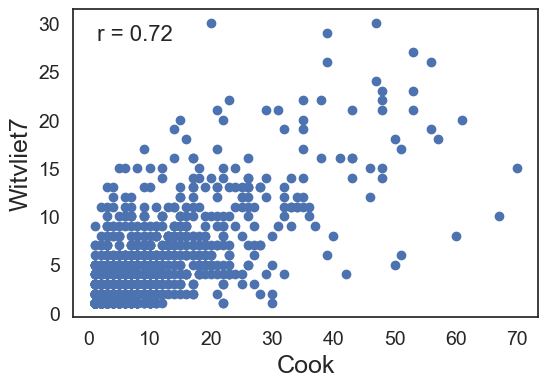

In [26]:
# Save the above scatter plots

plt.figure(figsize=(6,4))
# Cook chem vs Wit7 
df = chem_syn_weights.dropna(subset=['weight_cook_herm_chem', 'weight_wit7'])
plt.scatter(df['weight_cook_herm_chem'], df['weight_wit7'])

plt.xlabel('Cook', fontsize=18)
plt.ylabel('Witvliet7', fontsize=18)

# Add the correlation text in the top-left corner of the plot
correlation1 = df['weight_cook_herm_chem'].corr(df['weight_wit7'])
plt.text(x=0.05, y=0.95, s=f'r = {correlation1:.2f}', fontsize=16, 
         transform=plt.gca().transAxes, verticalalignment='top')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig(Path(full_path.parent,'figure_components/cook_wit7_synaptic_weight_scatter.pdf'))

plt.show()

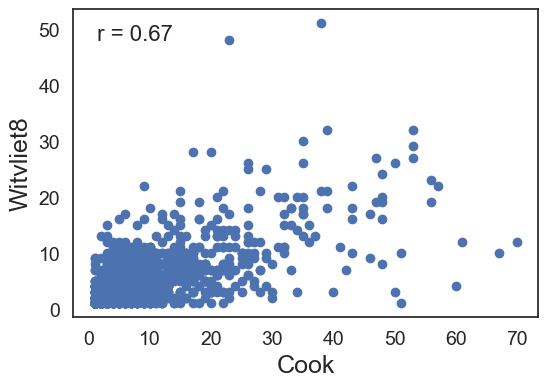

In [27]:
# Save the above scatter plots

plt.figure(figsize=(6,4))
# Cook chem vs Wit7 
df = chem_syn_weights.dropna(subset=['weight_cook_herm_chem', 'weight_wit8'])
plt.scatter(df['weight_cook_herm_chem'], df['weight_wit8'])

plt.xlabel('Cook', fontsize=18)
plt.ylabel('Witvliet8', fontsize=18)

# Add the correlation text in the top-left corner of the plot
correlation1 = df['weight_cook_herm_chem'].corr(df['weight_wit8'])
plt.text(x=0.05, y=0.95, s=f'r = {correlation1:.2f}', fontsize=16, 
         transform=plt.gca().transAxes, verticalalignment='top')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig(Path(full_path.parent,'figure_components/cook_wit8_synaptic_weight_scatter.pdf'))

plt.show()

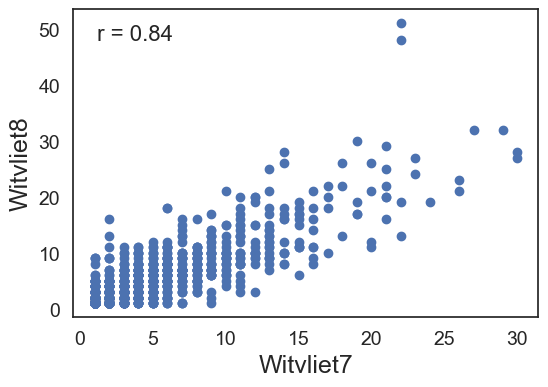

In [28]:
# Save the above scatter plots

plt.figure(figsize=(6,4))
# Cook chem vs Wit7 
df = chem_syn_weights.dropna(subset=['weight_wit7', 'weight_wit8'])
plt.scatter(df['weight_wit7'], df['weight_wit8'])

plt.xlabel('Witvliet7', fontsize=18)
plt.ylabel('Witvliet8', fontsize=18)

# Add the correlation text in the top-left corner of the plot
correlation1 = df['weight_wit7'].corr(df['weight_wit8'])
plt.text(x=0.05, y=0.95, s=f'r = {correlation1:.2f}', fontsize=16, 
         transform=plt.gca().transAxes, verticalalignment='top')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig(Path(full_path.parent,'figure_components/wit7_wit8_synaptic_weight_scatter.pdf'))

plt.show()

In [29]:
import scipy.stats as stats
import statsmodels.stats.multitest as multi

groups = [wit7.Weight, wit8.Weight, cook_herm_chem.Weight, cook_male_chem.Weight]
group_names = ['Wit7', 'Wit8', 'Cook herm', 'Cook male']

# Perform Kruskal-Wallis test
_, p_value = stats.kruskal(*groups)

# Calculate pairwise differences
pairwise_differences = []
for i in range(len(groups)):
    for j in range(i+1, len(groups)):
        group1 = group_names[i]
        group2 = group_names[j]
        _, p_value_pairwise = stats.mannwhitneyu(groups[i], groups[j], alternative='two-sided')
        pairwise_differences.append((group1, group2, p_value_pairwise))

# Create a DataFrame of pairwise differences
pairwise_table = pd.DataFrame(pairwise_differences, columns=['Group 1', 'Group 2', 'p-value'])

# Adjust p-values for multiple comparisons
pairwise_table['Adjusted p-value'] = multi.multipletests(pairwise_table['p-value'], method='holm')[1]

# Print the table of pairwise differences
print("Pairwise Differences Table:")
print(pairwise_table)


Pairwise Differences Table:
     Group 1    Group 2        p-value  Adjusted p-value
0       Wit7       Wit8   1.881636e-01      1.881636e-01
1       Wit7  Cook herm   2.565412e-34      7.696235e-34
2       Wit7  Cook male  9.609307e-125     5.765584e-124
3       Wit8  Cook herm   5.994766e-27      1.198953e-26
4       Wit8  Cook male  4.367543e-110     2.183772e-109
5  Cook herm  Cook male   2.209798e-48      8.839191e-48
